In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


%matplotlib inline

<h1>Vamos a predecir el Sentimiento de Texto usando BOW!!</h1>

In [2]:
##Vamos a utlizar un dataset de tweets sobre aerolíneas que fueron manualmente anotados con su sentimiento/polaridad
tweets = pd.read_csv("Tweets.csv")

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


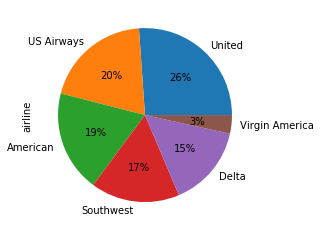

In [4]:
##Distribución de Tweets por compañia
tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

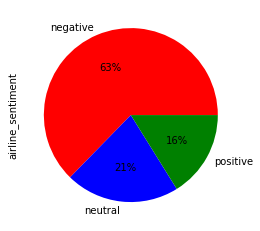

In [5]:
##Distribución de sentimientos en todo el dataset
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "blue", "green"])

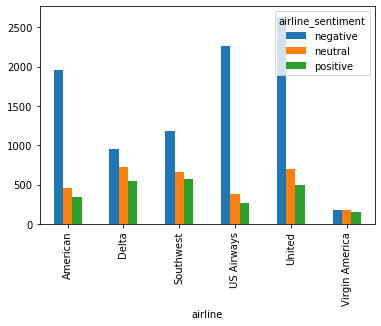

In [6]:
#Distribución de sentimiento por aerolinea
airline_sentiment = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [7]:
def processing_text(texto):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    return processed_feature
    

In [8]:
#Separamos el texto de los labels
texto_para_procesar = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

texto_procesado = []

for sentence in range(0, len(texto_para_procesar)):
    procesado = processing_text(texto_para_procesar[sentence]).lower()
    texto_procesado.append(procesado)

print(texto_para_procesar[1:5])
print(texto_procesado[1:5])
    

["@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'
 "@VirginAmerica and it's a really big bad thing about it"]
[' virginamerica plus you ve added commercials to the experience    tacky ', ' virginamerica didn today    must mean need to take another trip ', ' virginamerica it really aggressive to blast obnoxious  entertainment  in your guests  faces  amp  they have little recourse', ' virginamerica and it a really big bad thing about it']


In [9]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(texto_procesado).toarray()

In [10]:
###Aca dividimos nuestro dataset en entrenamiento y texto
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)


# Modelos Supervisados (Naive Bayes, Arboles de Desición)

In [11]:
###Ahora entrenemos un modelo simple. Ya conocenos Naive Bayes!!
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
#### Ahora vamos a evaluar que tan bueno es nuestro modelo NB, tulizando el set de pruebas
predictions = gnb.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[640 455 775]
 [ 63 211 340]
 [ 28  53 363]]
              precision    recall  f1-score   support

    negative       0.88      0.34      0.49      1870
     neutral       0.29      0.34      0.32       614
    positive       0.25      0.82      0.38       444

    accuracy                           0.41      2928
   macro avg       0.47      0.50      0.40      2928
weighted avg       0.66      0.41      0.44      2928

0.4146174863387978


In [14]:
###Ahora con Arboles de Desición
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
cart.fit(X_train, y_train)

predictions = cart.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1793    0   77]
 [ 577    0   37]
 [ 266    0  178]]
              precision    recall  f1-score   support

    negative       0.68      0.96      0.80      1870
     neutral       0.00      0.00      0.00       614
    positive       0.61      0.40      0.48       444

    accuracy                           0.67      2928
   macro avg       0.43      0.45      0.43      2928
weighted avg       0.53      0.67      0.58      2928

0.673155737704918


c:\users\ruben.manrique\documents\python3generalenv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
###Ahora con un probemos con un método mas avanzado RandomForest
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
###Ahora evaluamos que tan bueno es

predictions = rfc.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


# Métodos Ensamblados

<h1>Bagging</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html


In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
num_trees = 50
bagging = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
bagging.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=100,
 

In [18]:
predictions = rfc.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


<h1>Boosting AdaBoost</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [19]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=cart, n_estimators=50, random_state=0)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [20]:
predictions = rfc.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995
